In [2]:
import pandas as pd

df = pd.read_csv("../data/processed/filtered_dataset.csv")


In [3]:
X = df.drop(columns=['Label'])   
y = df['Label']                  

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


models = {
    "Logistic Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=2000))
    ]),
    "Random Forest": RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(n_estimators=100, random_state=42),
    "MLP Classifier": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", MLPClassifier(hidden_layer_sizes=(100,), max_iter=200, early_stopping=True, validation_fraction=0.1, n_iter_no_change=5, random_state=42))
    ]),
    "Linear SVM": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LinearSVC(max_iter=5000, random_state=42))
    ])
}


# Train and evaluate
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    results[name] = {"Train Accuracy": train_acc, "Test Accuracy": test_acc}
    print(f"{name} - Train: {train_acc:.4f} | Test: {test_acc:.4f}")


Logistic Regression - Train: 0.9258 | Test: 0.9254
Random Forest - Train: 1.0000 | Test: 0.9985
XGBoost - Train: 0.9986 | Test: 0.9984
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 445245, number of negative: 1817055
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.126153 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6896
[LightGBM] [Info] Number of data points in the train set: 2262300, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.196811 -> initscore=-1.406348
[LightGBM] [Info] Start training from score -1.406348
LightGBM - Train: 0.9978 | Test: 0.9977
MLP Classifier - Train: 0.9777 | Test: 0.9776
Linear SVM - Train: 0.9200 | Test: 0.9199


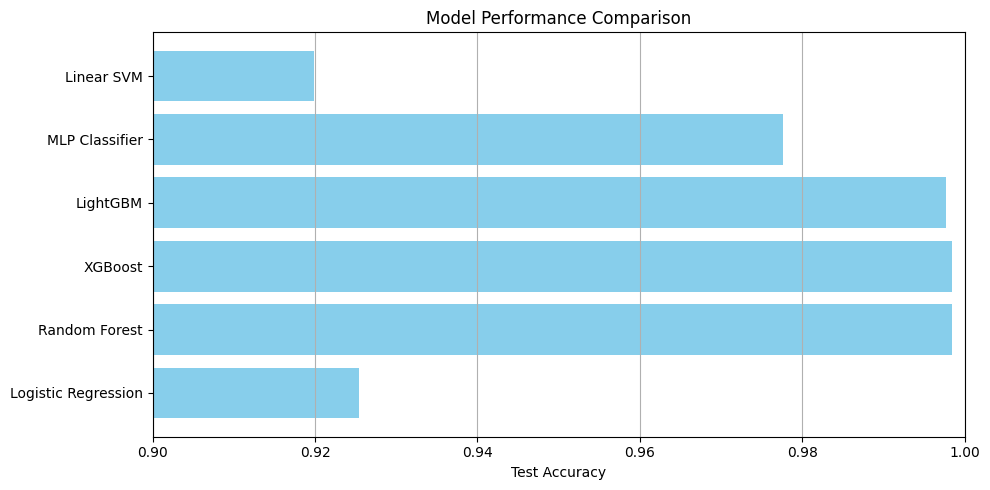

In [9]:
import matplotlib.pyplot as plt

names = list(results.keys())
# Extract only the test accuracy
scores = [v["Test Accuracy"] for v in results.values()]

plt.figure(figsize=(10, 5))
plt.barh(names, scores, color='skyblue')
plt.xlabel("Test Accuracy")
plt.title("Model Performance Comparison")
plt.xlim(0.9, 1.0) 
plt.grid(axis='x')
plt.tight_layout()
plt.show()


In [11]:
import joblib
import os

# Ensure models folder exists
os.makedirs("../models", exist_ok=True)

# Save all trained models
for name, model in models.items():
    filename = f"../models/{name.replace(' ', '_').lower()}.pkl"
    joblib.dump(model, filename)
    print(f" Saved: {filename}")

# Optionally save the test data too
joblib.dump((X_test, y_test), "../models/test_data.pkl")
print(" Saved: ../models/test_data.pkl")


 Saved: ../models/logistic_regression.pkl
 Saved: ../models/random_forest.pkl
 Saved: ../models/xgboost.pkl
 Saved: ../models/lightgbm.pkl
 Saved: ../models/mlp_classifier.pkl
 Saved: ../models/linear_svm.pkl
 Saved: ../models/test_data.pkl
